In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

pd.set_option('max_columns', 100)

In [2]:
#load the files
test = pd.read_csv("D:/Coursera/data/test.csv", index_col=0)
submission = pd.read_csv("D:/Coursera/data/sample_submission.csv", index_col=0)
shops = pd.read_csv("D:/Coursera/data/shops.csv", index_col = 1)
train = pd.read_csv("D:/Coursera/data/sales_train_v2.csv", index_col=False)
item_categories = pd.read_csv("D:/Coursera/data/item_categories.csv", index_col = 1)

train.index.names = ['ID']
train.date = pd.to_datetime(train.date, format='%d.%m.%Y', errors='coerce')
train['month'] = pd.DatetimeIndex(train.date).month
train['year'] = pd.DatetimeIndex(train.date).year

In [3]:
items = pd.read_csv("D:/Coursera/data/items.csv", index_col=False)
train = train.merge(items[['item_id','item_category_id']], on=['item_id'], how='inner')
train.head().T

,0,1,2,3,4
date,2013-01-02 00:00:00,2013-01-23 00:00:00,2013-01-20 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00
date_block_num,0,0,0,0,0
shop_id,59,24,27,25,25
item_id,22154,22154,22154,22154,22154
item_price,999,999,999,999,999
item_cnt_day,1,1,1,1,1
month,1,1,1,1,1
year,2013,2013,2013,2013,2013
item_category_id,37,37,37,37,37


In [4]:
test['month'] = 11
test['year'] = 2015
test['date_block_num'] = (train.date_block_num.max() + 1)
test.head().T

ID,0,1,2,3,4
shop_id,5,5,5,5,5
item_id,5037,5320,5233,5232,5268
month,11,11,11,11,11
year,2015,2015,2015,2015,2015
date_block_num,34,34,34,34,34


In [5]:
print('Train min/max date: %s / %s' % (train.date.min().date(), train.date.max().date()))
print()
print('Number of days in train: %d' % ((train.date.max() - train.date.min()).days + 1))
print()
print('Train shape: %d rows' % train.shape[0])
print('Test shape: %d rows'  % test.shape[0])

Train min/max date: 2013-01-01 / 2015-10-31

Number of days in train: 1034

Train shape: 2935849 rows
Test shape: 214200 rows


In [6]:
# test data was created by multiplying 42 shops by 5100 items
print(test.item_id.value_counts().head())
print(test.shop_id.value_counts().head())
print(test.nunique())

2047     42
19744    42
15406    42
13359    42
3240     42
Name: item_id, dtype: int64
59    5100
16    5100
28    5100
26    5100
25    5100
Name: shop_id, dtype: int64
shop_id             42
item_id           5100
month                1
year                 1
date_block_num       1
dtype: int64


shop_id               42
item_id             5100
item_category_id      62
dtype: int64
214200


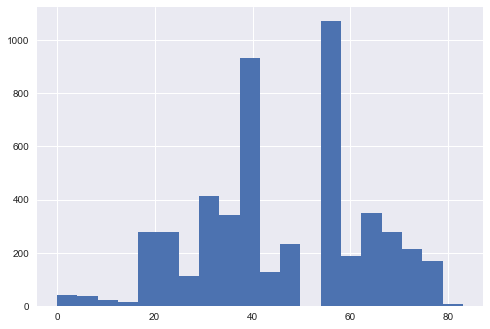

In [7]:
test = pd.read_csv("D:/Coursera/data/test.csv", index_col=0)
test = test.merge(items[['item_id','item_category_id']], on=['item_id'], how='inner')
print(test.nunique())
test[(test.shop_id == 4)].item_category_id.hist(bins=20)
print(test[['item_id','shop_id']].drop_duplicates().shape[0])

In [8]:
train_unique = train.nunique()
train_unique

date                 1034
date_block_num         34
shop_id                60
item_id             21807
item_price          19993
item_cnt_day          198
month                  12
year                    3
item_category_id       84
dtype: int64

In [66]:
import itertools

# This function looks for a combination of elements 
# with product of train.shape[0] 
def find_prod(data):
    # combinations of not more than 5 features
    for n in range(1, 6):
        # iterate through all combinations
        for c in itertools.combinations(range(len(data)), n):
            if data[list(c)].prod() == train.shape[0]:
                print(test_nunique.index[c])
                return
    print('Nothing found')
    
find_prod(train_unique.values)

Nothing found


In [67]:
import itertools

def find_ncombinations(data,target):
    # combinations of not more than 5 features
    for n in range(1, 5):
        for c in itertools.combinations(range(data.shape[1]), n):
            columns = train.columns[list(c)]
            if train[columns].drop_duplicates().shape[0] == target:
                print(columns)
                return
    print('Nothing found')

    
find_ncombinations(train,train.shape[0])

Nothing found


In [9]:
#g = train[['item_id', 'shop_id']].groupby(['item_id','shop_id'])
#g = pd.DataFrame(g.size())
#g.columns = ['group_size']
#g = g.reset_index()
#g.sort_values(by='group_size', ascending=False).head()

g= train.groupby(['shop_id','item_id'])
#g.date_diff.mean()
g.size().sort_values(ascending=False).head(10)

shop_id  item_id
28       20949      867
53       20949      863
31       20949      863
22       20949      848
42       20949      834
56       20949      830
16       20949      828
21       20949      824
7        20949      823
35       20949      817
dtype: int64

In [10]:
train[(train.shop_id == 31) & (train.item_id == 20949)].date_block_num.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33], dtype=int64)

In [11]:
#train.item_category_id.value_counts()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
date                datetime64[ns]
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
month               int64
year                int64
item_category_id    int64
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 224.0 MB


In [68]:
import seaborn as sns
sns.set(palette='pastel')
sns.set(font_scale=2)

In [113]:
# from absolute dates to relative
train['date_diff'] =  (train.date - train.date.min()).dt.days
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_category_id,date_diff
0,2013-01-02,0,59,22154,999.0,1.0,1,2013,37,1
1,2013-01-23,0,24,22154,999.0,1.0,1,2013,37,22
2,2013-01-20,0,27,22154,999.0,1.0,1,2013,37,19
3,2013-01-02,0,25,22154,999.0,1.0,1,2013,37,1
4,2013-01-03,0,25,22154,999.0,1.0,1,2013,37,2
5,2013-01-20,0,25,22154,999.0,1.0,1,2013,37,19
6,2013-01-23,0,25,22154,999.0,1.0,1,2013,37,22
7,2013-01-26,0,25,22154,999.0,1.0,1,2013,37,25
8,2013-01-27,0,6,22154,999.0,1.0,1,2013,37,26
9,2013-01-10,0,15,22154,999.0,1.0,1,2013,37,9


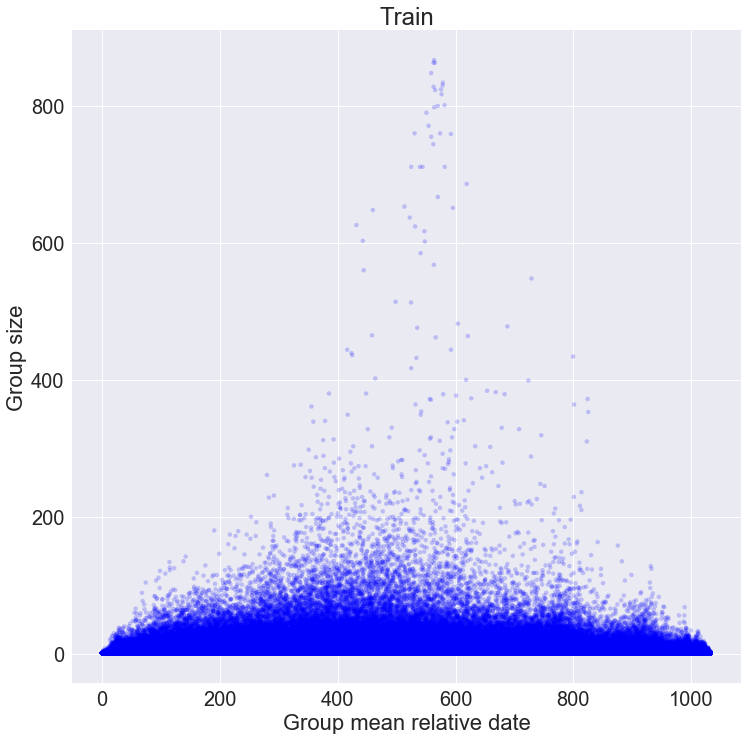

In [117]:
# group by the index, that we've found
g= train.groupby(['shop_id','item_id'])

# and for each index show average relative date versus 
# the number of rows with that index
plt.figure(figsize=(12,12))
plt.scatter(g.date_diff.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.title('Train');

In [40]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,date_diff
ID,,,,,,,,,
0,2013-01-02,0,59,22154,999.00,1.0,1,2013,0
1,2013-01-03,0,25,2552,899.00,1.0,1,2013,0
2,2013-01-05,0,25,2552,899.00,-1.0,1,2013,0
3,2013-01-06,0,25,2554,1709.05,1.0,1,2013,0
4,2013-01-15,0,25,2555,1099.00,1.0,1,2013,0


In [44]:
# from absolute dates to relative
test['date_diff'] =  (test.date_block_num - test.date_block_num.min())

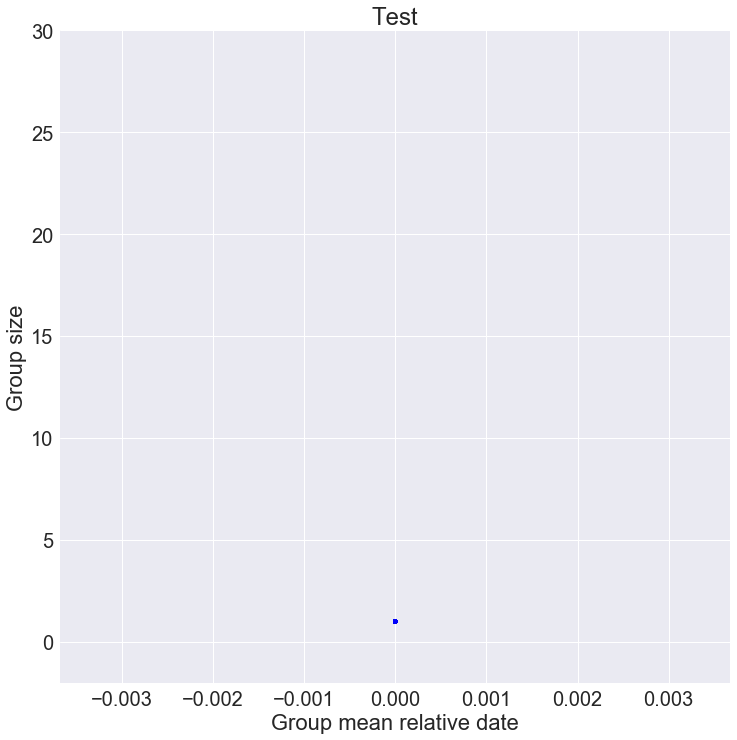

In [45]:
# group by the index, that we've found
g= test.groupby(['shop_id','item_id'])

# and for each index show average relative date versus 
# the number of rows with that index
plt.figure(figsize=(12,12))
plt.scatter(g.date_diff.mean(),g.size(),edgecolor = 'none',alpha = 0.2, s=20, c='b')
plt.xlabel('Group mean relative date')
plt.ylabel('Group size')
plt.ylim(-2, 30)
plt.title('Test');

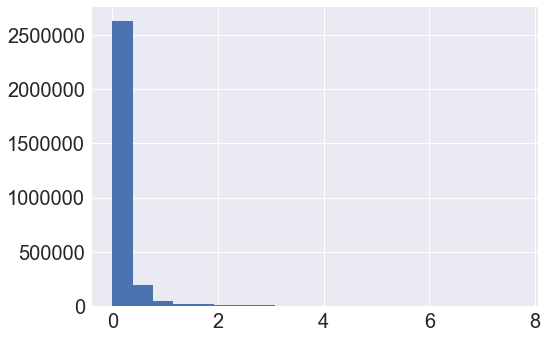

In [149]:
#train['x_item_cnt_day'] = np.log(train.item_cnt_day)
train.x_item_cnt_day.hist(bins=20)

In [140]:
train.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [150]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'month', 'year', 'item_category_id', 'date_diff',
       'x_item_cnt_day'],
      dtype='object')

[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

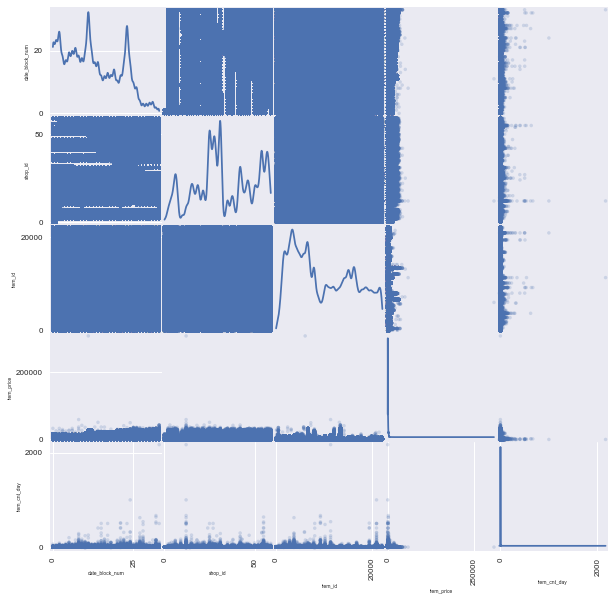

In [162]:
x = train[['date_block_num','shop_id','item_id','item_price','item_cnt_day']]
axes = pd.plotting.scatter_matrix(x, alpha=0.2, figsize=(10,10), diagonal='kde')
#y ticklabels
#[plt.setp(item.yaxis.get_majorticklabels(), 'size', 15) for item in axes.ravel()]
#x ticklabels
#[plt.setp(item.xaxis.get_majorticklabels(), 'size', 5) for item in axes.ravel()]
#y labels
[plt.setp(item.yaxis.get_label(), 'size', 5) for item in axes.ravel()]
#x labels
[plt.setp(item.xaxis.get_label(), 'size', 5) for item in axes.ravel()]

0.69314718055994529

In [163]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_category_id,date_diff,x_item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0,1,2013,37,1,0.0
1,2013-01-23,0,24,22154,999.0,1.0,1,2013,37,22,0.0
2,2013-01-20,0,27,22154,999.0,1.0,1,2013,37,19,0.0
3,2013-01-02,0,25,22154,999.0,1.0,1,2013,37,1,0.0
4,2013-01-03,0,25,22154,999.0,1.0,1,2013,37,2,0.0


In [174]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_category_id,date_diff,x_item_cnt_day
0,2013-01-02,0,0,22154,999.0,1.0,1,2013,37,1,0.0
1,2013-01-23,0,1,22154,999.0,1.0,1,2013,37,22,0.0
2,2013-01-20,0,2,22154,999.0,1.0,1,2013,37,19,0.0
3,2013-01-02,0,3,22154,999.0,1.0,1,2013,37,1,0.0
4,2013-01-03,0,3,22154,999.0,1.0,1,2013,37,2,0.0


In [17]:
print("num of unique items in test not in train: %d" % test[(~test.item_id.isin(train.item_id))].item_id.unique().shape[0])
print("num of unique shops in test not in train: %d" % test[(~test.shop_id.isin(train.shop_id))].shop_id.unique().shape[0])

num of unique items in test not in train: 363
num of unique shops in test not in train: 0


In [8]:
train.nunique(dropna = False)

date                 1034
date_block_num         34
shop_id                60
item_id             21807
item_price          19993
item_cnt_day          198
month                  12
year                    3
item_category_id       84
dtype: int64

In [3]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~train[c1].isnull()) & (~train[c2].isnull())
            if i>=j:
                b.append((train.loc[mask,c1].values>=train.loc[mask,c2].values).mean())
            else:
                b.append((train.loc[mask,c1].values>train.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [5]:
train = pd.read_csv("D:/Coursera/data/pp_train_data.csv",index_col=0)
train.head()
#num_cols = list(train.select_dtypes(exclude=['datetime64']).columns)
#num_cols = ['item_price','item_cnt_day']
#gt_matrix(train[num_cols],16)

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,item_id,shop_id,date_block_num,month,year,item_price,item_category_id
0,0,54,20,9,2014,58.0,40
1,1,55,15,4,2014,4490.0,76
2,1,55,18,7,2014,4490.0,76
3,1,55,19,8,2014,4490.0,76
4,1,55,20,9,2014,4490.0,76


date                datetime64[ns]
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_cnt_day               float64
month                        int64
year                         int64
item_category_id             int64
dtype: object